# Assignment 8: Seaborn

## Learning Objectives
This lesson meets the following learning objectives:

- The ability to visualize data using Seaborn.

## Instructions
Read through all of the text in this page. This assignment provides step-by-step training divided into numbered sections. The sections often contain embeded exectable code for demonstration.  Section headers with icons have special meanings:  

- <i class="fas fa-puzzle-piece"></i> The puzzle icon indicates that the section provides a practice exercise that must be completed.  Follow the instructions for the exercise and do what it asks.  Exercises must be turned in for credit.
- <i class="fa fa-cogs"></i> The cogs icon indicates that the section provides a task to perform.  Follow the instructions to complete the task.  Tasks are not turned in for credit but must be completed to continue progress.

Review the list of items in the **Expected Outcomes** section to check that you feel comfortable with the material you just learned. If you do not, then take some time to re-review that material again. If after re-review you are not comfortable, do not feel confident or do not understand the material, please ask questions on Slack to help.

Follow the instructions in the **What to turn in** section to turn in the exercises of the assginment for course credit.


## Background

[Seaborn](https://seaborn.pydata.org/) is a statistical data vizualization library based on `matplotlib` that provides a higher-level interface. This library is extremely useful for producing 'standard' or otherwise common plots. It is a collection of plotting functions written using `matplotlib`.

This notebook will be based on the [official seaborn tutorial](https://seaborn.pydata.org/tutorial.html)

## <i class="fa fa-cogs"></i> Notebook Setup
Before we get started we need to import the `seaborn`, `pandas`, `numpy` and `matplotlib` packages.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Seaborn Introduction

The API to `seaborn` contains functions for mulitple types of plots including: relational, scatter, line, a variety for categorical data, distributions, regressions, and heatmaps. In addition it provides some functions for creating color palettes. You can see a complete list on functions on the [API Reference page](https://seaborn.pydata.org/api.html).

Seaborn provides an [example gallary](https://seaborn.pydata.org/examples/index.html) of plots.  As an example, we've been working with the iris dataset in the previous tutorials.  Below is an example of a plot created by Seaborn displaying all pair-wise scatterplots of the iris dataset:

![seaborn iris plot](./media/A08-seaborn-pairplot-4.png)

Seaborn comes with a few demo datasets that can be used to practice working with the package. These can be disovered by calling the `get_dataset_names` function. *Note:* You may receive a warning message about parsing HTML. It is safe to ignore this message so long as you recieve the list of datasets.

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Observe that the iris dataset we've been using recently is included!  You can load any dataset you want to practice with using the `load_dataset` function. For example, to view the iris dataset:

In [3]:
iris_df = sns.load_dataset('iris')
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


And another dataset containing restaurant tip data:

In [4]:
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Seaborn helps us achieve beautiful plots using both Pandas and Matplotlib but with much fewer lines of code.  The first function listed in both the Seaborn tutorial and the API documenation is `relplot`. Our dive into Seaborn will begin there.  To demonstrate this function, we can recreate the pair-wise scatterplot ahoqn above with the following single line of code:

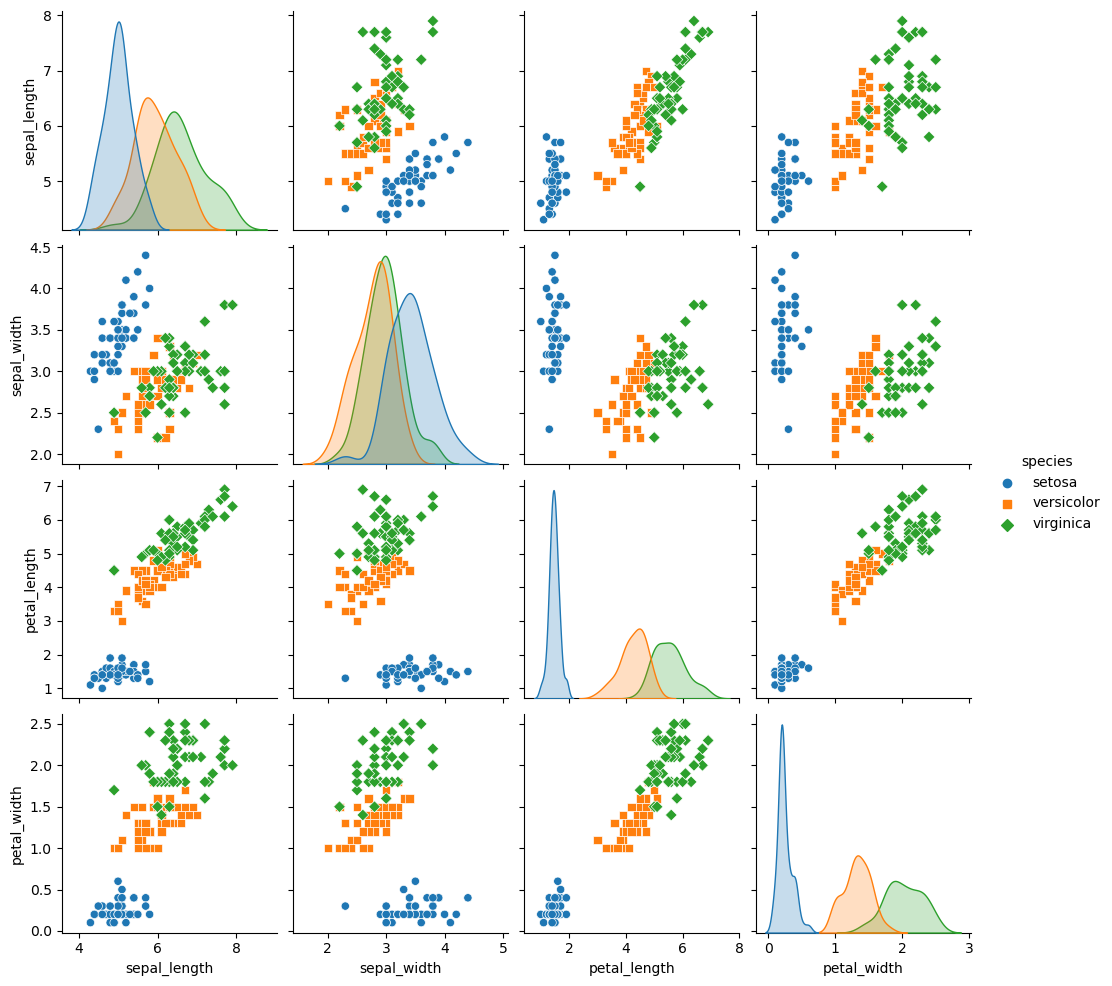

In [5]:
sns.pairplot(iris_df, hue="species", markers=["o", "s", "D"])

### 1.1. <i class="fas fa-puzzle-piece"></i> Practice

In the cell below notebook, perform the following.

+ View available datasets by calling `sns.get_dataset_names`.
+ Choose one of those datasets and explore it.
  + What is the shape?
  + What are the columns?
  + What are the data types?
  + Are there missing values?
  + Are there duplicated rows?
  + For categorical columns find the unique set of categories.
  + Is the data tidy? 

In [26]:
sns.get_dataset_names()
mpg = sns.load_dataset('mpg')
print(mpg.head(5))

print(mpg.dtypes)

mpg.duplicated().sum()
#zero duplicated values

mpg.isna().sum()
#6 missing values in horespower

mpg["origin"].nunique()
mpg["origin"]


#Data looks tidy to me

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object


0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 398, dtype: object

### 1.2. <i class="fas fa-cogs"></i> Explore

Take some time to peruse the Seaborn [example gallery](https://seaborn.pydata.org/examples/index.html).  In the cell below, indicate which plot types are most interesting to you. Which do you expect will be most useful with current research projects you may be working on?

## 2. Visualizing Relationships

***Note:*** The following instructions are derived from Seaborn's 
[Visualization statistical relationships](https://seaborn.pydata.org/tutorial/relational.html) page.

Seaborn provides three functions for plotting relationships between data: `relplot`, `scatterplot` and `lineplot`.  In practice, we can use the `replot` function to create both scatterplots and line plots. By default it provides a scatterplot.

To use `relplot` we must provide the following arguments:

+ data:  the nmae of the dataframe that contains data from which the relationships should be plotted.
+ x:  the name of the column in the dataframe that contains the x-axis values.
+ y:  the name of the column in the dataframe that contains the y-axis values.


As an example, let's plot the tips data provided by Seaborn using the `relplot` function. We imported the data in section 2, therefore, as a reminder, let's examine the data:

In [ ]:
tips.head()

Now, let's plot the default scatterplot of the tip and total bill values:

In [ ]:
sns.relplot(x="total_bill", y="tip", data=tips);

### 2.1 The `hue` semantic

Scatterplots only show relationships between two variables, but it is often useful to display other dimensions and these can be shown using colors.  We can highlight a 3rd dimension using hte `hue` argument of `relplot`. The tutorial notes:

> While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

To examine if there is a relationship between men and women who tip, we can add the `hue` argument and set that to be the label for the `sex` column of tips dataframe:

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

### 2.2  The `style` semantic

Additional dimensions of the data can be shown using the `style` argument of `relplot`.  It works in the same was as the `hue` argument but instead changes the style of the points in the plot.  The tutorial notes:

> To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

Let's change the style of the points dependent if the tipper is a smoker or not:

In [ ]:
sns.relplot(x="total_bill", y="tip", style="smoker", data=tips);

We can also combine both the `style` and `hue` semantics into a single plot:

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

### 2.3 The `size` semantic
Just like the `hue` and `style` we can change the size of the points as well using the `size` argument.  Again, we will provide the label for the column that contains the size information.  The tips data from Seaborn conveniently comes with a column named `size`.  For other datasets you will have to prepare a size column for the data frame.  Let's apply the size:

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

### 2.4 Setting the height and width of the plot
You can control the height and widght of the plot by providing the `height` and `aspect` arguments to `replot`.  The `height` is provided in inches and the `aspect` argument is a factor multipled by the height to calculate the width:

```
  width = aspect * height
```

As an example, we can scale the width of the plot to be twice the height:

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips, aspect=2);

### 2.5. <i class="fas fa-puzzle-piece"></i> Practice

In the cell below notebook, perform the following.

Experiment with the `size`, `hue` and `style` semantics by applying them to another example dataset of your choice.

*You should produce three or more plots for this task.*

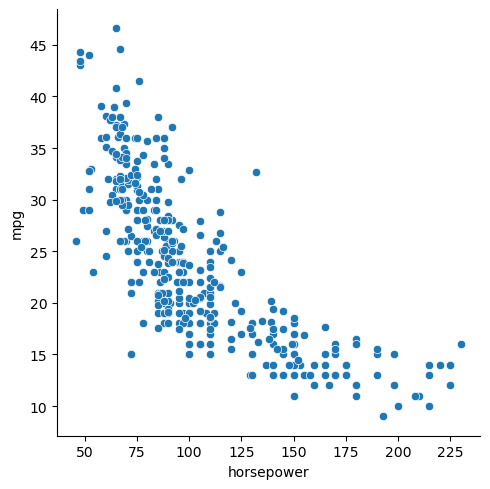

In [32]:
sns.relplot(x="horsepower", y="mpg", data=mpg);

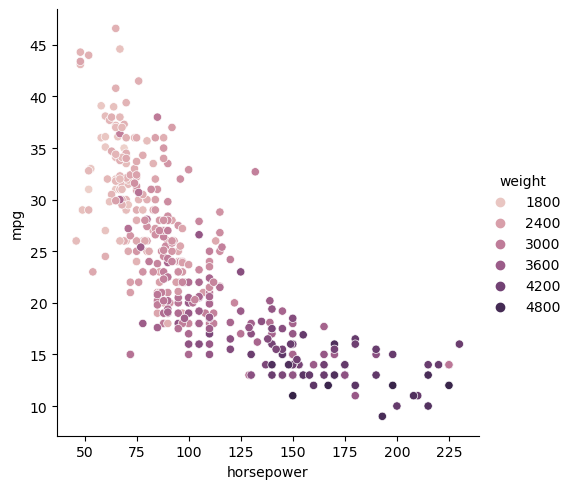

In [34]:
sns.relplot(x="horsepower", y="mpg", hue="weight", data=mpg)

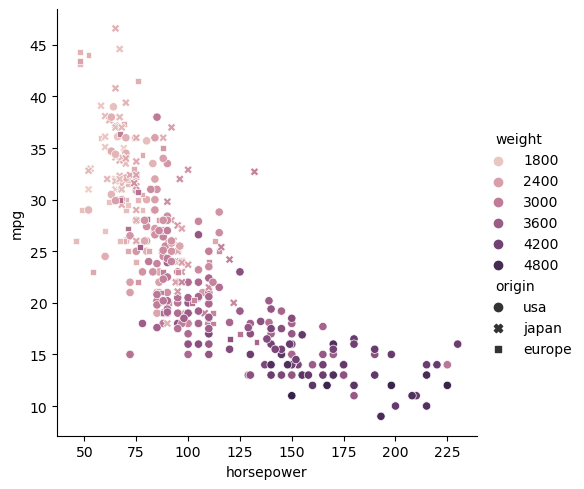

In [36]:
sns.relplot(x="horsepower", y="mpg", hue="weight", style="origin", data=mpg);

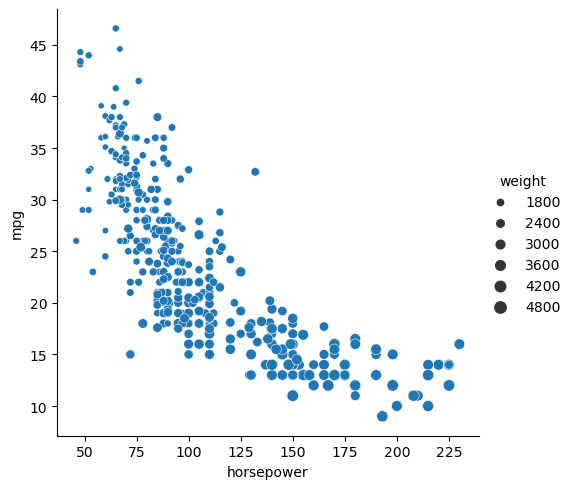

In [38]:
sns.relplot(x="horsepower", y="mpg", size="weight", data=mpg)

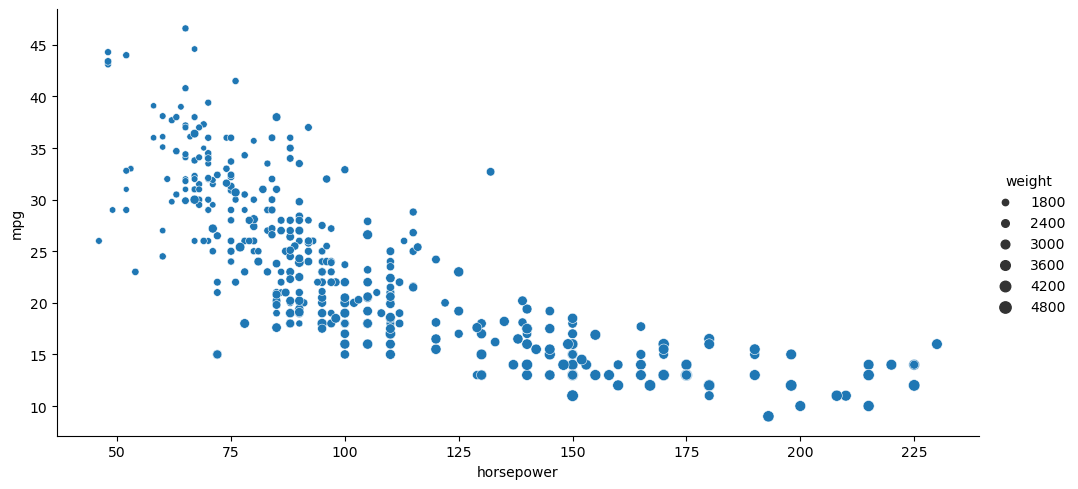

In [39]:
sns.relplot(x="horsepower", y="mpg", size="weight", data=mpg, aspect=2)

## 3. Aesthetics
You can control various aspects of the look-and-feel of your plots.  Seaborn provides professional looking aesthetics that you can control including the plot dimensions (size and aspect), built-in attractive styles, and color pallettes. The [Seaborn aesthetics documentation](https://seaborn.pydata.org/tutorial/aesthetics.html) provides full details.  There are two types of aesthetics that Seaborn provides:

1. parameters to control the style of the plot
2. parameters for scaling of elements in the plot

As indicated in the online documentation: 
> The interface for manipulating [aesthetics] parameters are two pairs of functions. To control the style, use the `axes_style()` and `set_style()` functions. To scale the plot, use the `plotting_context()` and `set_context()` functions. In both cases, the first function returns a dictionary of parameters and the second sets the matplotlib defaults.




To explore the list of styles that are currently set for the plot we can use call the `sns.axes_style()` function:

In [40]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>,
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

To explore the list of parameters that can be used to scale elements of the plat we can call `sns.plotting_context` function

In [41]:
sns.plotting_context()

{'font.size': 10.0,
 'axes.labelsize': 'medium',
 'axes.titlesize': 'large',
 'xtick.labelsize': 'medium',
 'ytick.labelsize': 'medium',
 'legend.fontsize': 'medium',
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0,
 'legend.title_fontsize': None}

### 3.1 Built-in Figure Styles

Seaborn provides five built-in styles for figures:

+ darkgrid
+ whitegrid
+ dark
+ white
+ ticks

If you would like to change the default aesthetics, you can set a style using the `set_style` function prior to creating the plot. Let's choose the `whitegrid` style.

In [42]:
sns.set_style('whitegrid')          

Then we can explore the new dictionary of parameters with `axes_style` function.

In [43]:
sns.axes_style()  

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

Notice that the `axis.grid` argument is set to `True`. Now that we've set the aesthetics, let's create the plot.

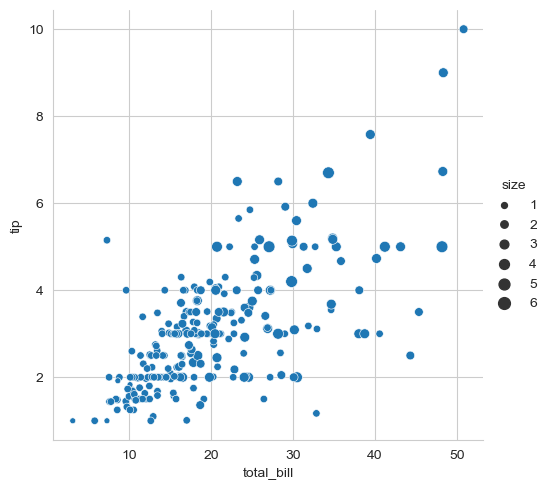

In [44]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

Observe that we now have grid lines.

### 3.2. <i class="fas fa-puzzle-piece"></i> Practice

In the cell below notebook, perform the following.
Using a dataset of your choice, practice creating a plot for each of these different styles:

+ darkgrid
+ whitegrid
+ dark
+ white
+ ticks

### 3.3 Modifying Built-in Styles

Sometimes the built-in style may need adjustments to suit your liking or the needs of a plot.  You can customize any style using the `set_style` function.  It is often easier to start with a built-in style and modify it for a given purpose. To do this, we provide the style name as the first argument and a Python dictionary with custom settings as the second argument. The dictionary should specify the style changes. For example, suppose we wanted a darker background:

In [ ]:
# Create a dictionary with the default style settings we want.
custom_style = {'figure.facecolor': 'white',
                'axes.facecolor': 'black'}

# Call the set_style function to start with the darkgrid style, but pass in our adjustments.
sns.set_style("darkgrid", custom_style)

# Create the plot.
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

To reset the style to default, simply call `sns.set()`.

In [ ]:
# Reset the style settings to default.
sns.set()  

# Redraw the plot to demonstrate all is back to the default settings.
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

### 3.4 Color Palettes

Color choices are **very** important for conveying meaning, and choosing good colors is not immediately obvious. Also, when creating figures for publication is is important to consider that some indivduals are color blind and may have difficulty with specific colors.  NASA has [compiled an informative document](https://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/), providing recommended color palettes.  These are already implemented in `matplotlib`, `seaborn` and other packages.  For an additional reference on Seaborn color palettes see: [Seaborn color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html).  Additionally, [Online tools](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3) can help develop color maps can be found.


Let's first examine the default palette provided by Seaborn.  This can be returned with a call to the `color_palette` function.

In [ ]:
sns.color_palette()

The palette is represented in an array of tuples where each tuple is a color and contains three numbers.  Computers use 3 numbers to represent colors, each corresponding to a specific shade of red, green and blue.  Seaborn provides those numbers between the values of 0 and 1. Below is a list of fully saturated colors and their meaning (e.g. at least one number in the tuple is set to 1):

- (0, 0, 0): black
- (1, 1, 1): white
- (1, 0, 0): red
- (0, 1, 0): green
- (0, 0, 1): blue
- (1, 1, 0): yellow
- (0, 1, 1): cyan
- (1, 0, 1): purple
- etc.,

Fortunately, we have a convenience function named `palplot` to view these colors:

In [ ]:
sns.palplot([(0,0,0), (1,1,1), (1,0,0), (0,1,0), (0,0,1), (1,1,0), (0,1,1), (1,0,1)])

Let's use the `sns.palplot` to examine the default Seaborn palette:

In [ ]:
sns.palplot(sns.color_palette())

Let's examine the tips scatterplot to observe the colors.

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips);

Observe that the colors are used in order that they appear in the palette.

Seaborn has a short list of built-in palettes:
```python
['deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind']
```
We can create a palette of colors from any of these categories by calling the `color_palette` function, passing the palette name and the number of colors from that palette that we need.  For the tips data, if we want to use the `bright` palette we must use two colors--one for each sex:


In [ ]:
sns.color_palette('bright', 2)

***Note:*** recall that Seaborn is a set of wrapper functions for `matplotlib`, so it should not be a suprise that we can use any `matplotlib` color map, which you can find [here](https://matplotlib.org/tutorials/colors/colormaps.html).

Let's try again creating a plot with a dark-background plot but with a more vibrant palette of colors.  You set a palette for a plot by providing the color pallette as an arument.  In the case of the `replopt` function we can provide colors using the `palette` argument.  First let's use a palette from Seaborn. Let's color the tips data by the size amounts.  From previous plots we know we have 6 colors:

In [ ]:
# Create a dictionary with the style settings we wantto adjust.
custom_style = {'figure.facecolor': 'white',
                'axes.facecolor': 'black'}

# Call the set_style function to start with the darkgrid style, but pass in our adjustements.
sns.set_style("darkgrid", custom_style)

# Create the plot.
colors=sns.color_palette('bright', 6)
sns.relplot(x="total_bill", y="tip", hue="size", data=tips, palette=colors);

If we provide palettes with names, such as from matplot lib we don't need to know how many colors are required. Here, we'll use the 'Accent' palette from matplotlib:

In [ ]:
# Create a dictionary with the style settings we wantto adjust.
custom_style = {'figure.facecolor': 'white',
                'axes.facecolor': 'black'}

# Call the set_style function to start with the darkgrid style, but pass in our adjustements.
sns.set_style("darkgrid", custom_style)

# Create the plot.
sns.relplot(x="total_bill", y="tip", hue="size", data=tips, palette='Accent');

Before continuing let's reset the plots style

In [ ]:
sns.set()

### 3.5 Temporarily setting a style

At the end of the previous section we had to remember to reset any style changes that we made using a call to `set`.  However, we can use a  `with` statement to [temporarily set a figure style](https://seaborn.pydata.org/tutorial/aesthetics.html#temporarily-setting-figure-style). This feature allows for any style changes to be lost upon exiting the `with` context manager.  For example:

In [ ]:
# Create style dictionary:
my_style_options = {'figure.facecolor': 'white',
                    'axes.facecolor': 'black'}

# Apply style changes temporarily.
with sns.axes_style("darkgrid", rc=my_style_options):
    sns.relplot(x="total_bill", y="tip", hue="size", data=tips, 
                palette='Accent',    # Change the color.
                edgecolor="none",  # Remove the white outline.
                height=7, aspect=1.2); 

### 3.6. <i class="fas fa-puzzle-piece"></i> Practice

In the cell below notebook, perform the following.

Experiment with the style options and palettes introduced above. Create and demonstrate a style of your own using a dataset of your choice.

## 4. Wrap-up

During this tutorial we covered only the `relplot` function.  However, Seaborn offers a variety of  functions for different types of plots.  For Task 2b you explored some examples in the Seaborn Gallery. Now that you know the basics you should be able to apply what you have learned to other types of plots. 

## 5. <i class="fas fa-puzzle-piece"></i> Practice

In the cell below notebook, perform the following.

Examine the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html) and find **two to four plots** types that interest you. Re-create a version of those plots using a different data set (make any other style changes you wish).


## 6. Saving your Figures
Seaborn provides a `savefig` function for its plot objects to make saving of images easy.  It works similar to the Maplotlib `savefig` function. For example:

In [ ]:
df = sns.load_dataset('iris')
sns_plot = sns.pairplot(df, hue='species', size=2.5)
sns_plot.savefig("output.png", format='png', dpi=72)

## Expected Outcomes
At this point, you should feel comfortable with the following:
- Creating plots with Seaborn.
- Setting the style and aesthetics of Seaborn plots.

## What to Turn in?
Be sure to **commit** and **push** your changes to this notebook.  All practice exercises should be completed.  Once completed, send a **Slack message** to the instructor indicating you have completed this assignment. The instructor will verify all work is completed. 